In [1]:
%pip install -qU langchain
%pip install pydantic
%pip install langchain-openai
%pip install tiktoken
%pip install graphviz

In [2]:
import os
import getpass

# Set OPENAI API Key

os.environ["OPENAI_API_KEY"] = getpass.getpass("OpenAI API Key:")

# OR (load from .env file)
# make sure you have python-dotenv installed
# from dotenv import load_dotenv
# load_dotenv("./.env")



# Trying Out Different Learning Acronyms

## ADEPT

- A:= analogy
- D:= diagram
- E:= example
- P:= plain english
- T:= technical definition

> This still needs a bridge into what the person cares about. So teachiing some formalization technique or trick to bring that person's interests into the problem/concept

In [3]:
from langchain.utils.openai_functions import convert_pydantic_to_openai_function
from langchain.schema.runnable import RunnableLambda
from langchain_core.prompts import ChatPromptTemplate
from langchain.schema.runnable import RunnableParallel
from langchain_openai import ChatOpenAI

def chain_analogy(llm): 
    return ChatPromptTemplate.from_template("Write a simple analogy for this concept: '''{concept}''', which should perfectly encapsulate\
        what it is.") | llm

def chain_diagram(llm):
    return ChatPromptTemplate.from_template("Write a knowledge graph with the necessary concepts and elements to understand the following concept: '''{concept}''', this diagram should perfectly encapsulate\
        what it is and what it relates to.") | llm

def chain_example(llm):
    return ChatPromptTemplate.from_template("Write down five examples that perfectly demonstrate this concept: '''{concept}'''. ") | llm


def chain_plain_english(llm):
    return ChatPromptTemplate.from_template("Write a plain english definition for this concept: '''{concept}'''") | llm


def chain_technical_definition(llm):
    return ChatPromptTemplate.from_template("Write a short and precise technical definition for this concept: '''{concept}'''") | llm


llm_chat = ChatOpenAI()

analogy_chain = chain_analogy(llm_chat)
diagram_chain = chain_diagram(llm_chat)
example_chain = chain_example(llm_chat)
plain_english_chain = chain_plain_english(llm_chat)
technical_definition_chain = chain_technical_definition(llm_chat)


concept = "joint probability mass function"
map_chain = RunnableParallel(analogy=analogy_chain, diagram=diagram_chain, example=example_chain, 
                             plain_english=plain_english_chain, technical_def=technical_definition_chain)
output_explanation = map_chain.invoke({"concept": concept})
output_explanation

{'analogy': AIMessage(content='A joint probability mass function is like a recipe that shows the likelihood of two ingredients being used together in a dish.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 23, 'prompt_tokens': 32, 'total_tokens': 55, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-98fd3b8d-213b-4210-a2c6-39de8133b647-0', usage_metadata={'input_tokens': 32, 'output_tokens': 23, 'total_tokens': 55, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 0}}),
 'diagram': AIMessage(content='A joint probability mass function is a function that gives the probability that two or more discrete random variables X and Y take on specific values x and y. It is denoted as P(X=x, Y=y) or P(x, y).\n\nKe

In [4]:
from IPython.display import Markdown, display


for key in output_explanation.keys():
    display(Markdown(f"**{key}**\n\n{output_explanation[key].content}\n\n"))

**analogy**

A joint probability mass function is like a recipe that shows the likelihood of two ingredients being used together in a dish.



**diagram**

A joint probability mass function is a function that gives the probability that two or more discrete random variables X and Y take on specific values x and y. It is denoted as P(X=x, Y=y) or P(x, y).

Key Concepts:
1. Random Variables: Variables that can take on different values as outcomes of a random phenomenon.
2. Discrete Random Variables: Random variables that can only take on a countable number of distinct values.
3. Probability Mass Function (PMF): A function that gives the probability of a discrete random variable taking on a specific value.
4. Joint Probability Mass Function: A function that gives the probability of two or more discrete random variables taking on specific values simultaneously.
5. Marginal Probability: The probability of a single event occurring without consideration of any other events.
6. Conditional Probability: The probability of an event occurring given that another event has already occurred.

Elements:
- X and Y: Discrete random variables that are being considered.
- P(X=x, Y=y): The joint probability mass function for variables X and Y.
- Marginal Probability: P(X=x) and P(Y=y) representing the probabilities of individual events.
- Conditional Probability: P(X=x | Y=y) and P(Y=y | X=x) representing the probability of one event given another event.

Relations:
- Joint Probability Mass Function relates the probabilities of multiple random variables occurring together.
- Marginal probabilities can be calculated from the joint probability mass function by summing or averaging over the other variable.
- Conditional probabilities can be calculated from the joint probability mass function by considering the events of one variable given the occurrence of another variable.



**example**

1. The joint probability mass function of rolling a fair six-sided die twice and getting a 1 on the first roll and a 2 on the second roll is 1/36.
2. The joint probability mass function of flipping two fair coins and getting heads on both flips is 1/4.
3. The joint probability mass function of drawing two cards from a standard deck of 52 cards without replacement and getting a red card followed by a black card is 26/51 * 26/50.
4. The joint probability mass function of selecting two balls from an urn containing 3 red balls and 2 blue balls without replacement and getting a red ball followed by a blue ball is 3/5 * 2/4.
5. The joint probability mass function of selecting two marbles from a bag containing 5 red marbles and 3 blue marbles with replacement and getting a red marble followed by a blue marble is (5/8) * (3/8).



**plain_english**

A joint probability mass function is a mathematical function that assigns probabilities to different combinations of outcomes from two or more random variables in a discrete probability distribution.



**technical_def**

A joint probability mass function is a function that assigns probabilities to the various combinations of outcomes for multiple random variables in a discrete probability distribution.



Ok, this is nice but can we make it better? Like the knowledge graph is not visual, how can we improve upon that? 

In [5]:
# from pydantic import BaseModel, Field
from langchain.pydantic_v1 import BaseModel, Field
from typing import List
from graphviz import Digraph
import argparse
from langchain.output_parsers import PydanticOutputParser
import graphviz
from IPython.display import display

class Node(BaseModel):
    id: int
    label: str
    color: str

class Edge(BaseModel):
    source: int
    target: int
    label: str
    color: str = "black"

class KnowledgeGraph(BaseModel):
    """A knowledge graph is a graph that represents knowledge as a set of entities and relations between them."""
    nodes: List[Node] = Field(..., description="A list of nodes in the knowledge graph")
    edges: List[Edge] = Field(..., description="A list of edges in the knowledge graph")


def visualize_knowledge_graph(kg: KnowledgeGraph):
    dot = Digraph(comment="Knowledge Graph")

    # Add nodes
    for node in kg.nodes:
        dot.node(str(node.id), node.label, color=node.color)

    # Add edges
    for edge in kg.edges:
        dot.edge(str(edge.source), str(edge.target), label=edge.label, color=edge.color)

    # Render the graph
    display(graphviz.Source(dot.source))

/Users/greatmaster/miniconda3/envs/oreilly-langchain/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3577: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  exec(code_obj, self.user_global_ns, self.user_ns)


Now, let's modify the `chain_diagram()` function to output a schema that's appropriate for generating a knowledge graph.

In [6]:
from langchain.utils.openai_functions import convert_pydantic_to_openai_function
openai_function_knowledge_graph = convert_pydantic_to_openai_function(KnowledgeGraph)

llm_chat = ChatOpenAI()    
llm_with_tools = llm_chat.bind(functions=[openai_function_knowledge_graph])

chain = chain_diagram(llm_with_tools)
concept = "large language models"

output_graph = chain.invoke({"concept": concept})
output_graph

/var/folders/5l/y8s3fc655417629rqwgxkhx80000gn/T/ipykernel_32042/3605930416.py:2: LangChainDeprecationWarning: The function `convert_pydantic_to_openai_function` was deprecated in LangChain 0.1.16 and will be removed in 1.0. Use :meth:`~langchain_core.utils.function_calling.convert_to_openai_function()` instead.
  openai_function_knowledge_graph = convert_pydantic_to_openai_function(KnowledgeGraph)


AIMessage(content='', additional_kwargs={'function_call': {'arguments': '{"nodes":[{"id":1,"label":"Large Language Models","color":"#ffcc00"},{"id":2,"label":"Natural Language Processing","color":"#33cc33"},{"id":3,"label":"Machine Learning","color":"#3366cc"}],"edges":[{"source":1,"target":2,"label":"is a part of"},{"source":2,"target":3,"label":"relies on"}]}', 'name': 'KnowledgeGraph'}, 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 96, 'prompt_tokens': 157, 'total_tokens': 253, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'function_call', 'logprobs': None}, id='run-3d13854b-95e8-46be-bfc3-601b759cd0e0-0', usage_metadata={'input_tokens': 157, 'output_tokens': 96, 'total_tokens': 253, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 0}})

Ok, so we are getting the right output, which we can access like this:

In [7]:
output_graph.additional_kwargs["function_call"]["arguments"]

'{"nodes":[{"id":1,"label":"Large Language Models","color":"#ffcc00"},{"id":2,"label":"Natural Language Processing","color":"#33cc33"},{"id":3,"label":"Machine Learning","color":"#3366cc"}],"edges":[{"source":1,"target":2,"label":"is a part of"},{"source":2,"target":3,"label":"relies on"}]}'

But we want this output to be perfectly tailored for a function that visualizes the graph, so let's do that. 

In [8]:
from langchain.output_parsers import PydanticOutputParser

pydantic_output_parser = PydanticOutputParser(pydantic_object=KnowledgeGraph)

output_graph_json_dict = output_graph.additional_kwargs["function_call"]["arguments"]
output_graph_json_dict 

'{"nodes":[{"id":1,"label":"Large Language Models","color":"#ffcc00"},{"id":2,"label":"Natural Language Processing","color":"#33cc33"},{"id":3,"label":"Machine Learning","color":"#3366cc"}],"edges":[{"source":1,"target":2,"label":"is a part of"},{"source":2,"target":3,"label":"relies on"}]}'

In [9]:
pydantic_output_parser.parse(output_graph_json_dict)

KnowledgeGraph(nodes=[Node(id=1, label='Large Language Models', color='#ffcc00'), Node(id=2, label='Natural Language Processing', color='#33cc33'), Node(id=3, label='Machine Learning', color='#3366cc')], edges=[Edge(source=1, target=2, label='is a part of', color='black'), Edge(source=2, target=3, label='relies on', color='black')])

Yay! As you can see above, the output of parsing with the pydantic_output_parser is the `KnowledgeGraph` object, which we can feed into the 
`visualize_graph` function to get the final output.

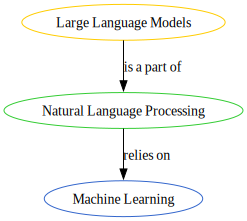

In [10]:
kg = pydantic_output_parser.parse(output_graph_json_dict)

visualize_knowledge_graph(kg)

Yaaay victory!!! Now, let's wrap this into a modified version of the original chain by using the RunnableLambda Object to do the 
intermediary step we were doing before.

Nice! How about we put everything together under a class that represents this LangChain implementation of the ADEPT method?

In [11]:
from dataclasses import dataclass
from typing import Any
from langchain_core.prompts import ChatPromptTemplate
from langchain.schema.runnable import RunnableParallel
from langchain_openai.chat_models import ChatOpenAI

@dataclass
class ADEPT:
    concept: str
    llm_chat = ChatOpenAI()
    
    def chain_analogy(self):
        return ChatPromptTemplate.from_template("Write a simple analogy for this concept: '''{concept}''', which should perfectly encapsulate\
            what it is.") | llm_chat

    
    def chain_diagram_viz(self):
        """Full chain to generate the formatted knowledge graph"""
        openai_function_knowledge_graph = convert_pydantic_to_openai_function(KnowledgeGraph) 
        llm_with_tools = llm_chat.bind(functions=[openai_function_knowledge_graph])
        pydantic_output_parser = PydanticOutputParser(pydantic_object=KnowledgeGraph)
        return ChatPromptTemplate.from_template("Write a knowledge graph with the necessary concepts and elements to understand the following concept: '''{concept}''', this diagram should perfectly encapsulate\
            what it is and what it relates to.") | llm_with_tools | RunnableLambda(lambda x: x.additional_kwargs["function_call"]["arguments"]) | pydantic_output_parser
        

    def chain_example(self):
        return ChatPromptTemplate.from_template("Write down five examples that perfectly demonstrate this concept: '''{concept}'''. ") | llm_chat


    def chain_plain_english(self):
        return ChatPromptTemplate.from_template("Write a plain english definition for this concept: '''{concept}'''") | llm_chat


    def chain_technical_definition(self):
        return ChatPromptTemplate.from_template("Write a short and precise technical definition for this concept: '''{concept}'''") | llm_chat
    
    def visualize_knowledge_graph(self, kg: KnowledgeGraph):
        dot = Digraph(comment="Knowledge Graph")

        # Add nodes
        for node in kg.nodes:
            dot.node(str(node.id), node.label, color=node.color)

        # Add edges
        for edge in kg.edges:
            dot.edge(str(edge.source), str(edge.target), label=edge.label, color=edge.color)

        # Render the graph
        display(graphviz.Source(dot.source))
        
    # now let's write a __call__ method that runs all of the chains and generates a nice output just from the concept input.
    def __call__(self):
        analogy_chain = self.chain_analogy()
        diagram_chain = self.chain_diagram_viz()
        example_chain = self.chain_example()
        plain_english_chain = self.chain_plain_english()
        technical_definition_chain = self.chain_technical_definition()
        map_chain = RunnableParallel(analogy=analogy_chain, diagram=diagram_chain, example=example_chain, 
                             plain_english=plain_english_chain, technical_def=technical_definition_chain)
        output_explanation = map_chain.invoke({"concept": self.concept})
        return output_explanation


In [12]:
concept = "artificial neural networks"

adept = ADEPT(concept)
adept

ADEPT(concept='artificial neural networks')

In [13]:
output_explanation = adept()

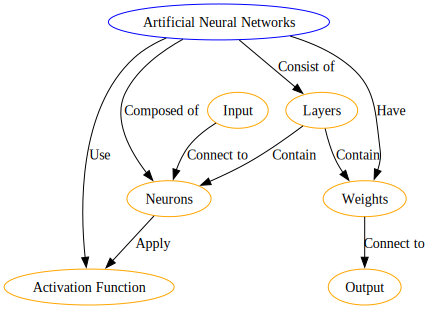

In [14]:
diagram = output_explanation["diagram"]

adept.visualize_knowledge_graph(diagram)

In [15]:
output_explanation["analogy"].content

'Artificial neural networks are like a team of interconnected neurons in the brain working together to solve a complex puzzle.'

In [16]:
output_explanation["example"].content

'1. Image recognition software that can accurately identify objects in photographs using a trained neural network.\n2. Speech recognition technology that converts spoken words into text by processing audio signals through a neural network.\n3. Autonomous vehicles that use neural networks to interpret sensor data and make decisions on steering, braking, and acceleration.\n4. Virtual assistants like Siri or Alexa that use neural networks to understand and respond to natural language queries.\n5. Predictive text algorithms on smartphones that suggest words or phrases based on user input and context, powered by neural networks.'

In [17]:
output_explanation["plain_english"].content

'Artificial neural networks are computer algorithms designed to mimic the way the human brain processes information. They are used in machine learning and artificial intelligence to recognize patterns and make decisions based on data.'

In [18]:
output_explanation["technical_def"].content

'Artificial neural networks are computational models inspired by the structure and function of the human brain, composed of interconnected nodes (neurons) that process and transmit information through weighted connections.'